In [1]:
#价格BOLL 选股
from matplotlib import rcParams
import matplotlib.pyplot as plt
import numpy as np

np.seterr(all='ignore')
rcParams['figure.figsize'] = (14, 6)

#扩展MOD
from funcat import * #FUNCAT的同花顺/通达信指标模块：和：&，或：|，其他基本相同。可以使用指标选股！！！
#from pytdx import * #通达信数据更新模块到QUANTAXIS的mongoDB
from tushare import * #TUSHARE数据连接更新。
from rqalpha import * #RQALPHA本地数据连接，通过 rqalpha update_bundle 8点后更新全部数据库
#from jaqs import * #QunatOS的jaqs客户端在线。
#from abupy import * #ABUPY本地化，数据在线下载更新，数据在线下载在根目录abu下
#from quantaxis import * #加载QUANTAXIS数据库模块，首先需要开启mongoDB+web服务器，数据更新通过通达信服务器。
#from hikyuu import * #HIKYUU本地化，数据库在根目录的stock。通过通达信导入。

#读取/设定数据库时间区域，当前股票，选股时间段。 
import time
import datetime
n1 = (time.strftime("20%y-%m-%d"))## 20yy-mm-dd格式，输出当日日期
print ("读取当日时间格式n1",n1) #当日时间格式：yyyy-mm-dd
n2 = (time.strftime("20%y%m%d"))## 20yymmdd格式，输出当日日期
print ("读取当日时间格式n2",n2) #当日时间格式：yyyymmdd
def getYesterday(): 
    today=datetime.date.today() 
    oneday=datetime.timedelta(days=10) 
    yesterday=today-oneday  
    return yesterday
n3 = (getYesterday())# 输出前二天日期
print ("读取前二日时间格式n3",n3) #前日时间格式：yyyy-mm-dd
i = datetime.datetime.now()#当前日期
n4 = ("%s%s%s" % (i.year, i.month, i.day) )
print ("读取当日时间格式n4",n4) #当日时间格式：yyyymmdd
n5 = ("%s" % i.isoformat() )
print ("读取当日时间格式n5",n5) #当日时间格式：yyyy-mm-dd:...

n8="20180201"#开始时间
print ("手动设定选股开始时间格式n8",n8)

n9="20180209"#结束时间
print ("手动设定选股结束时间格式n9",n9)

n10="20170101"#设定起始时间
print ("手动设定数据更新设定起始时间格式n10",n10)
x1="000001.XSHG"
print ("设定股票代码",x1)

#设定数据库连接：RQALPHA/TUSHARE
from funcat.data.tushare_backend import TushareDataBackend
from funcat.data.rqalpha_data_backend import RQAlphaDataBackend
backend = "rqalpha"
if backend == "rqalpha":
    set_data_backend(RQAlphaDataBackend("~/.rqalpha/bundle"))
elif backend == "tushare":
    set_data_backend(TushareDataBackend())
set_start_date(n10)

#当前股票最新数据显示。
S(x1)  # 设置当前关注股票
T(n9)   # 设置当前观察日期

print ("打印 开盘 最高 最低 收盘 成交量",O, H, L, C, V)  # 打印 Open High Low Close
print ("当天涨幅",C / C[1] - 1)  # 当天涨幅
print ("打印60日均线",MA(C, 60))  # 打印60日均线
print ("判断收盘价是否大于60日均线",C > MA(C, 60))  # 判断收盘价是否大于60日均线
print ("30日最高价",HHV(H, 30))  # 30日最高价
print ("最近30日，收盘价 Close 大于60日均线的天数",COUNT(C > MA(C, 60), 30))  # 最近30日，收盘价 Close 大于60日均线的天数
print ("10日均线上穿",CROSS(MA(C, 10), MA(C, 20)))  # 10日均线上穿
print ("最近10天收阳线的天数",COUNT(C > O, 10))  # 最近10天收阳线的天数
print ("最近60天K线实体的最高价",HHV(MAX(O, C), 60))  # 最近60天K线实体的最高价
print ("5日均线上穿10日均线",CROSS(MA(C, 5), MA(C, 10)))  # 5日均线上穿10日均线

print ("《选股》读取时间：==》n5",n5)   


#####BOLL选股 ！！！
select(
    lambda : CROSS(L, ((MA((O+H+L+C)/4, 22)) - STD(H, 22) * 2)) and CROSS(L,(MA((O+H+L+C)/4, 22))),
    start_date=(n3), end_date=(n2),
)    

print ("《结束选股》读取结束时间：==》n5",n5) 



读取当日时间格式n1 2018-06-16
读取当日时间格式n2 20180616
读取前二日时间格式n3 2018-06-06
读取当日时间格式n4 2018616
读取当日时间格式n5 2018-06-16T11:19:06.395786
手动设定选股开始时间格式n8 20180201
手动设定选股结束时间格式n9 20180209
手动设定数据更新设定起始时间格式n10 20170101
设定股票代码 000001.XSHG
打印 开盘 最高 最低 收盘 成交量 3172.85 3180.11 3062.74 3129.85 25638917600.0
当天涨幅 -0.04052666268144278
打印60日均线 3372.0388333333312
判断收盘价是否大于60日均线 False
30日最高价 3587.03
最近30日，收盘价 Close 大于60日均线的天数 24
10日均线上穿 False
最近10天收阳线的天数 3
最近60天K线实体的最高价 3563.64
5日均线上穿10日均线 False
《选股》读取时间：==》n5 2018-06-16T11:19:06.395786
lambda : CROSS(L, ((MA((O+H+L+C)/4, 22)) - STD(H, 22) * 2)) and CROSS(L,(MA((O+H+L+C)/4, 22))),
[20180615]
No data for 000003.XSHE
No data for 000013.XSHE
No data for 000015.XSHE
No data for 000047.XSHE
No data for 000405.XSHE
No data for 000412.XSHE
No data for 000508.XSHE
No data for 000542.XSHE
No data for 000556.XSHE
No data for 000588.XSHE
No data for 000621.XSHE
No data for 000653.XSHE
No data for 000658.XSHE
No data for 000660.XSHE
No data for 000675.XSHE
No data for 000689.XS

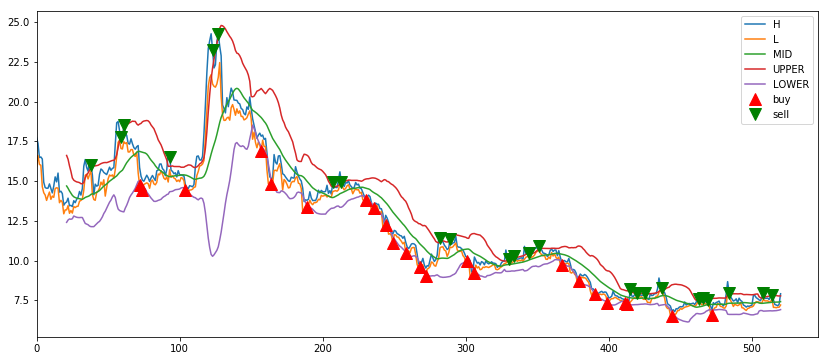

In [2]:
#N=20,P=2 BOLL 布林带
MID = MA((O+H+L+C)/4, 22)
UPPER = MID + STD(L, 22) * 2
LOWER = MID - STD(H, 22) * 2
ax = plt.subplot()
buy_signal = CROSS(L, LOWER) and CROSS(L,MID) 
sell_signal = CROSS(UPPER,H) and CROSS(UPPER,L)
ax.plot(H.series, label="H")
ax.plot(L.series, label="L")
ax.plot(MID.series, label="MID")
ax.plot(UPPER.series, label="UPPER")
ax.plot(LOWER.series, label="LOWER")
ax.set_xlim(0)
plt.plot(np.where(buy_signal.series)[0], L.series[np.where(buy_signal.series)[0]], "^", label="buy", markersize=12, color="red")
plt.plot(np.where(sell_signal.series)[0], H.series[np.where(sell_signal.series)[0]], "v", label="sell", markersize=12, color="green")
plt.legend(loc="best")
plt.show()

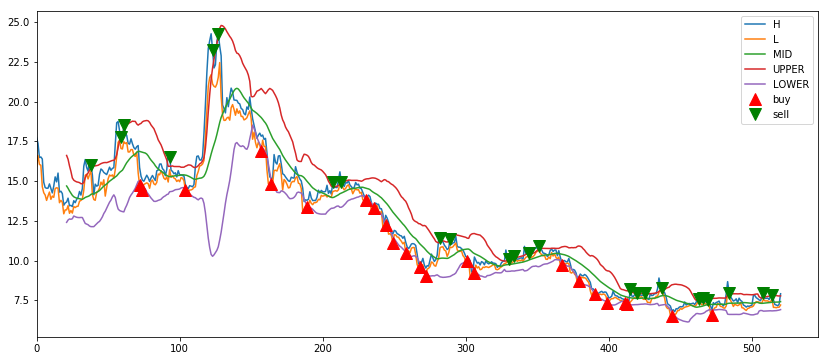

In [3]:
#N=20,P=2 BOLL 布林带
MID = (MA((O+H+L+C)/4, 22))
UPPER = ((MA((O+H+L+C)/4, 22)) + STD(L, 22) * 2)
LOWER = ((MA((O+H+L+C)/4, 22)) - STD(H, 22) * 2)


ax = plt.subplot()
buy_signal = CROSS(L, LOWER) and CROSS(L,MID) 

buy_signal = CROSS(L, ((MA((O+H+L+C)/4, 22)) - STD(H, 22) * 2)) and CROSS(L,(MA((O+H+L+C)/4, 22))) 




sell_signal = CROSS(UPPER,H) and CROSS(UPPER,L)
ax.plot(H.series, label="H")
ax.plot(L.series, label="L")
ax.plot(MID.series, label="MID")
ax.plot(UPPER.series, label="UPPER")
ax.plot(LOWER.series, label="LOWER")
ax.set_xlim(0)
plt.plot(np.where(buy_signal.series)[0], L.series[np.where(buy_signal.series)[0]], "^", label="buy", markersize=12, color="red")
plt.plot(np.where(sell_signal.series)[0], H.series[np.where(sell_signal.series)[0]], "v", label="sell", markersize=12, color="green")
plt.legend(loc="best")
plt.show()

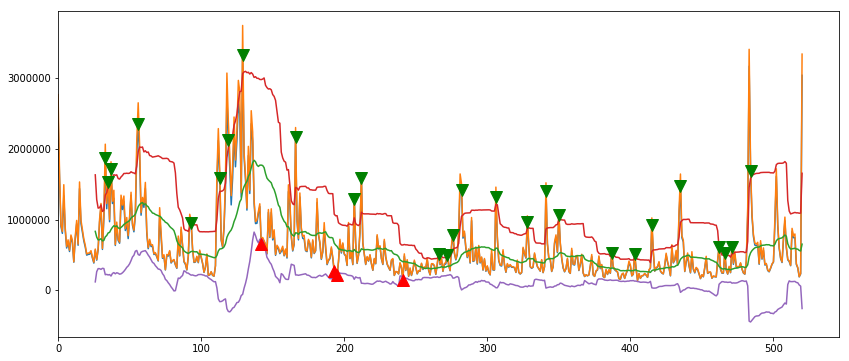

In [4]:
#价量 BOLL 布林带
VH=V/(H)
VL=V/(L)
VO=V/(O)
VC=V/(C)
MID = MA((VH+VL)/2, 27)
UPPER = MID + STD(VL, 27) * 1.618
LOWER = MID - STD(VH, 27) * 1.618
ax = plt.subplot()
buy_signal = CROSS(VL, LOWER) # and CROSS(VL,MID)
sell_signal = CROSS(UPPER,VH) and CROSS(UPPER,VL)
ax.plot(VH.series, label="VH")
ax.plot(VL.series, label="VL")
#ax.plot(VO.series, label="VO")
#ax.plot(VC.series, label="VC")
ax.plot(MID.series, label="MID")
ax.plot(UPPER.series, label="UPPER")
ax.plot(LOWER.series, label="LOWER")
ax.set_xlim(0)
plt.plot(np.where(buy_signal.series)[0], VL.series[np.where(buy_signal.series)[0]], "^", label="buy", markersize=12, color="red")
plt.plot(np.where(sell_signal.series)[0], VH.series[np.where(sell_signal.series)[0]], "v", label="sell", markersize=12, color="green")
#plt.legend(loc="best")
plt.show()

In [5]:
# 选股成交量BOLL  OK!!!
from funcat import * #FUNCAT的同花顺/通达信指标模块：和：&，或：|，其他基本相同。可以使用指标选股！！！
from tushare import * #TUSHARE数据连接更新。
from rqalpha import * #RQALPHA本地数据连接，通过 rqalpha update_bundle 8点后更新全部数据库

import time
import datetime #读取/设定数据库时间区域，当前股票，选股时间段。 

n1 = (time.strftime("20%y-%m-%d"))## 20yy-mm-dd格式，输出当日日期
print ("《设定测试》读取当日时间格式：n1",n1) #当日时间格式：yyyy-mm-dd
n2 = (time.strftime("20%y%m%d"))## 20yymmdd格式，输出当日日期
print ("《设定测试》读取当日时间格式：n2",n2) #当日时间格式：yyyymmdd
def getYesterday(): 
    today=datetime.date.today() 
    oneday=datetime.timedelta(days=10) 
    yesterday=today-oneday  
    return yesterday
n3 = (getYesterday())# 输出前二天日期
print ("《设定测试》读取前二日时间格式：n3",n3) #前日时间格式：yyyy-mm-dd
i = datetime.datetime.now()#当前日期

n4 = ("%s%s%s" % (i.year, i.month, i.day) )
print ("《设定测试》读取当日时间格式：n4",n4) #当日时间格式：yyyymmdd

n5 = ("%s" % i.isoformat() )
print ("《设定测试》读取当日时间格式：n5",n5) #当日时间格式：yyyy-mm-dd:...

n8="20180201"#开始时间
print ("《设定测试》手动设定选股开始时间格式：n8",n8)

n9="20180209"#结束时间
print ("《设定测试》手动设定选股结束时间格式：n9",n9)

def getYesterday(): 
    today=datetime.date.today() 
    oneday=datetime.timedelta(days=200) 
    yesterday=today-oneday  
    return yesterday
n10 = (getYesterday())# 输出前200天日期
#n10="20170101"#设定起始时间
print ("《设定测试》自动设定数据起始设定前推200天：n10",n10)

x1="000001.XSHG" #用rqalpha本地数据需要代码后缀！！！！XSHE=深圳，XSHG=上海
print ("《设定测试》设定股票代码",x1)

from funcat.data.tushare_backend import TushareDataBackend
from funcat.data.rqalpha_data_backend import RQAlphaDataBackend
backend = "rqalpha"  #设定数据库连接：rqalpha   tushare
if backend == "rqalpha":
    set_data_backend(RQAlphaDataBackend("~/.rqalpha/bundle"))
elif backend == "tushare":
    set_data_backend(TushareDataBackend())
set_start_date(n10)

S(x1)  # 设置当前关注股票
T(n9)   # 设置当前观察日期

print ("《数据测试》打印 开盘 最高 最低 收盘 成交量",O, H, L, C, V)  # 打印 Open High Low Close
print ("《数据测试》当天涨幅",C / C[1] - 1)  # 当天涨幅
print ("《数据测试》打印60日均线",MA(C, 60))  # 打印60日均线
print ("《数据测试》判断收盘价是否大于60日均线",C > MA(C, 60))  # 判断收盘价是否大于60日均线
print ("《数据测试》30日最高价",HHV(H, 30))  # 30日最高价
print ("《数据测试》最近30日，收盘价 Close 大于60日均线的天数",COUNT(C > MA(C, 60), 30))  # 最近30日，收盘价 Close 大于60日均线的天数
print ("《数据测试》10日均线上穿",CROSS(MA(C, 10), MA(C, 20)))  # 10日均线上穿
print ("《数据测试》最近10天收阳线的天数",COUNT(C > O, 10))  # 最近10天收阳线的天数
print ("《数据测试》最近60天K线实体的最高价",HHV(MAX(O, C), 60))  # 最近60天K线实体的最高价
print ("《数据测试》5日均线上穿10日均线",CROSS(MA(C, 5), MA(C, 10)))  # 5日均线上穿10日均线

print ("《RQALPHA本地化开始选股》读取开始时间：==》n5",n5) 
# 选股成交量BOLL  OK!!!
select(
    lambda : CROSS((V/L), ((MA(((V/H)+(V/L))/2,27))-STD((V/H),27)*1.618)) ,
    start_date=(n3), end_date=(n2),)

print ("《结束选股》读取结束时间：==》n5",n5) 

《设定测试》读取当日时间格式：n1 2018-06-16
《设定测试》读取当日时间格式：n2 20180616
《设定测试》读取前二日时间格式：n3 2018-06-06
《设定测试》读取当日时间格式：n4 2018616
《设定测试》读取当日时间格式：n5 2018-06-16T11:30:26.554067
《设定测试》手动设定选股开始时间格式：n8 20180201
《设定测试》手动设定选股结束时间格式：n9 20180209
《设定测试》自动设定数据起始设定前推200天：n10 2017-11-28
《设定测试》设定股票代码 000001.XSHG
《数据测试》打印 开盘 最高 最低 收盘 成交量 3172.85 3180.11 3062.74 3129.85 25638917600.0
《数据测试》当天涨幅 -0.04052666268144278
《数据测试》打印60日均线 3372.038833333332
《数据测试》判断收盘价是否大于60日均线 False
《数据测试》30日最高价 3587.03
《数据测试》最近30日，收盘价 Close 大于60日均线的天数 10
《数据测试》10日均线上穿 False
《数据测试》最近10天收阳线的天数 3
《数据测试》最近60天K线实体的最高价 3563.64
《数据测试》5日均线上穿10日均线 False
《RQALPHA本地化开始选股》读取开始时间：==》n5 2018-06-16T11:30:26.554067
lambda : CROSS((V/L), ((MA(((V/H)+(V/L))/2,27))-STD((V/H),27)*1.618)) ,
[20180615]
No data for 000003.XSHE
No data for 000013.XSHE
No data for 000015.XSHE
20180615 000016.XSHE 深康佳A
No data for 000047.XSHE
No data for 000405.XSHE
No data for 000412.XSHE
20180615 000488.XSHE 晨鸣纸业
No data for 000508.XSHE
20180615 000519.XSHE 中兵红箭
No data for 000542.XSH

20180608 600523.XSHG 贵航股份
20180608 600535.XSHG 天士力
20180608 600767.XSHG ST运盛
20180608 600843.XSHG 上工申贝
20180608 600866.XSHG 星湖科技
20180608 601028.XSHG 玉龙股份
20180608 603019.XSHG 中科曙光
20180608 603158.XSHG 腾龙股份
20180608 603368.XSHG 柳药股份
20180608 603369.XSHG 今世缘
20180608 603601.XSHG 再升科技
20180608 603660.XSHG 苏州科达
20180608 603990.XSHG 麦迪科技
[20180607]
20180607 000513.XSHE 丽珠集团
20180607 000797.XSHE 中国武夷
20180607 000801.XSHE 四川九洲
20180607 000802.XSHE 北京文化
20180607 000915.XSHE 山大华特
20180607 000965.XSHE 天保基建
20180607 002004.XSHE 华邦健康
20180607 002084.XSHE 海鸥住工
20180607 002116.XSHE 中国海诚
20180607 002156.XSHE 通富微电
20180607 002245.XSHE 澳洋顺昌
20180607 002276.XSHE 万马股份
20180607 002317.XSHE 众生药业
20180607 002370.XSHE 亚太药业
20180607 002393.XSHE 力生制药
20180607 002451.XSHE 摩恩电气
20180607 002463.XSHE 沪电股份
20180607 002533.XSHE 金杯电工
20180607 002603.XSHE 以岭药业
20180607 002668.XSHE 奥马电器
20180607 002687.XSHE 乔治白
20180607 002723.XSHE 金莱特
20180607 300009.XSHE 安科生物
20180607 300025.XSHE 华星创业
20180607 300121.XSHE 阳谷华泰
20180